In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_colwidth',80)

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
stopwords_eng = stopwords.words('english')

# Import Data

In [4]:
tweets_df = pd.read_csv('Data/sentiments_for_us_tweets.csv')
tweets_df.drop(tweets_df.columns[0], axis=1, inplace=True)

In [5]:
tweets_df.head()

,geo,text,user,location,Subject,state,Polarity,Sentiment
0,NaN,After the confrontation that cost Walter Wallace Jr. his life set off prote...,wheresestela1,New Jersey,Donald Trump,New Jersey,"{'neg': 0.448, 'neu': 0.552, 'pos': 0.0, 'compound': -0.743}",Negative
1,NaN,"""COVID-19 is still raging. Trump is still lying.""",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
2,NaN,"Donald Trump Jr.: ""Why aren't they talking about deaths? Oh, oh, because th...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts,"{'neg': 0.275, 'neu': 0.634, 'pos': 0.092, 'compound': -0.5574}",Negative
3,NaN,Let’s not forget who created these problems. Tell Donald Trump his scheme to...,ajserino,"New Jersey, USA",Donald Trump,New Jersey,"{'neg': 0.279, 'neu': 0.545, 'pos': 0.176, 'compound': -0.1779}",Negative
4,NaN,There is no greater supporter of Donald Trump in the world than Mark Zucker...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,"{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.6369}",Positive


# NLTK text preprocess

In [6]:
def clean_tweet(tweet):
    tweet = re.sub('RT','',tweet)
    tweet = re.sub('@','',tweet)
    tweet = re.sub('#','',tweet)
    tweet = re.sub('https?://[A-Za-z0-9./]*','',tweet)
    tweet = re.sub('\n','',tweet)
    return tweet

In [7]:
# lemmatization function
lemmatizer = WordNetLemmatizer()
def lemmatize_tweet(tweet):
    lemmatized_tweet = []
    for word in tweet:
        lemmatized_tweet.append(lemmatizer.lemmatize(word, pos='v'))
    return lemmatized_tweet

# stemming function
porter = PorterStemmer()
def stem_tweet(tweet):
    stemmed_tweet = []
    for word in tweet:
        stemmed_tweet.append(porter.stem(word))
    return stemmed_tweet


# remove stopwords function
def remove_stopwords(tweet):
    tweet_witout_stops = []
    for word in tweet:
        if word not in stopwords_eng:
            tweet_witout_stops.append(word)
    return tweet_witout_stops

In [8]:
tweets_df['cleaned_text'] = tweets_df['text'].apply(clean_tweet)

In [9]:
# make all text lowercase
tweets_df['cleaned_text'] = tweets_df['cleaned_text'].apply(lambda x: x.lower())

In [10]:
# remove punctuations and numbers and emoji
tweets_df['cleaned_text'] = tweets_df['cleaned_text'].str.replace("[^a-zA-z]", " ")

<ipython-input-10-7b644cf159d7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df['cleaned_text'] = tweets_df['cleaned_text'].str.replace("[^a-zA-z]", " ")


In [11]:
#tokenize text
tweets_df['tokenized_text'] = tweets_df['cleaned_text'].apply(lambda x: word_tokenize(x))

In [12]:
#remove stopwords
tweets_df['tokenized_text'] = tweets_df['tokenized_text'].apply(remove_stopwords)

In [13]:
#lemmatize text
tweets_df['lemmatized_text'] = tweets_df['tokenized_text']. apply(lemmatize_tweet)

In [14]:
#stem text
tweets_df['stemmed_text'] = tweets_df['lemmatized_text'].apply(stem_tweet)

In [15]:
#de tokenize text
tweets_df['lemmatized_string'] = tweets_df['lemmatized_text'].apply(lambda x: ' '.join(x))
tweets_df['stemmed_string'] = tweets_df['stemmed_text'].apply(lambda x: ' '.join(x))

In [16]:
tweets_df.head()

,geo,text,user,location,Subject,state,Polarity,Sentiment,cleaned_text,tokenized_text,lemmatized_text,stemmed_text,lemmatized_string,stemmed_string
0,NaN,After the confrontation that cost Walter Wallace Jr. his life set off prote...,wheresestela1,New Jersey,Donald Trump,New Jersey,"{'neg': 0.448, 'neu': 0.552, 'pos': 0.0, 'compound': -0.743}",Negative,after the confrontation that cost walter wallace jr his life set off prote...,"[confrontation, cost, walter, wallace, jr, life, set, protests, devolved, ri...","[confrontation, cost, walter, wallace, jr, life, set, protest, devolve, riot...","[confront, cost, walter, wallac, jr, life, set, protest, devolv, riot, loot,...",confrontation cost walter wallace jr life set protest devolve riot loot lead,confront cost walter wallac jr life set protest devolv riot loot lead
1,NaN,"""COVID-19 is still raging. Trump is still lying.""",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral,covid is still raging trump is still lying,"[covid, still, raging, trump, still, lying]","[covid, still, rag, trump, still, lie]","[covid, still, rag, trump, still, lie]",covid still rag trump still lie,covid still rag trump still lie
2,NaN,"Donald Trump Jr.: ""Why aren't they talking about deaths? Oh, oh, because th...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts,"{'neg': 0.275, 'neu': 0.634, 'pos': 0.092, 'compound': -0.5574}",Negative,donald trump jr why aren t they talking about deaths oh oh because th...,"[donald, trump, jr, talking, deaths, oh, oh, number, almost, nothing, gott]","[donald, trump, jr, talk, deaths, oh, oh, number, almost, nothing, gott]","[donald, trump, jr, talk, death, oh, oh, number, almost, noth, gott]",donald trump jr talk deaths oh oh number almost nothing gott,donald trump jr talk death oh oh number almost noth gott
3,NaN,Let’s not forget who created these problems. Tell Donald Trump his scheme to...,ajserino,"New Jersey, USA",Donald Trump,New Jersey,"{'neg': 0.279, 'neu': 0.545, 'pos': 0.176, 'compound': -0.1779}",Negative,let s not forget who created these problems tell donald trump his scheme to...,"[let, forget, created, problems, tell, donald, trump, scheme, undermine, rig...","[let, forget, create, problems, tell, donald, trump, scheme, undermine, righ...","[let, forget, creat, problem, tell, donald, trump, scheme, undermin, right, ...",let forget create problems tell donald trump scheme undermine right vote safely,let forget creat problem tell donald trump scheme undermin right vote safe
4,NaN,There is no greater supporter of Donald Trump in the world than Mark Zucker...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,"{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.6369}",Positive,there is no greater supporter of donald trump in the world than mark zucker...,"[greater, supporter, donald, trump, world, mark, zuckerberg, one, done, elect]","[greater, supporter, donald, trump, world, mark, zuckerberg, one, do, elect]","[greater, support, donald, trump, world, mark, zuckerberg, one, do, elect]",greater supporter donald trump world mark zuckerberg one do elect,greater support donald trump world mark zuckerberg one do elect


# Text classification

### Split the dataset into train and test 

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X = tweets_df['lemmatized_string']
y = tweets_df['Sentiment']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
model_scores =[]

#### Import Pipeline and metrics libraries

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import plot_confusion_matrix

## Naive Bayes

In [95]:
from sklearn.naive_bayes import MultinomialNB

text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [96]:
text_clf_nb.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [97]:
predictions = text_clf_nb.predict(X_test)

In [98]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.91      0.90      0.90       602
     Neutral       0.87      0.90      0.88       617
    Positive       0.88      0.85      0.86       447

    accuracy                           0.89      1666
   macro avg       0.89      0.88      0.88      1666
weighted avg       0.89      0.89      0.89      1666



In [99]:
print(f1_score(y_test,predictions,average='macro'))

0.8841167426610382


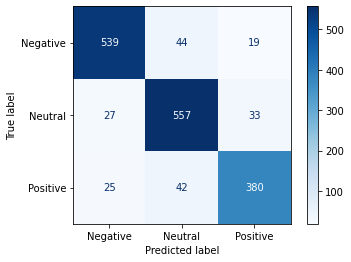

In [100]:
plot_confusion_matrix(text_clf_nb, X_test, y_test, cmap='Blues')
plt.show()

In [101]:
model_scores.append(f1_score(y_test,predictions,average='macro'))

## Linear SVC

In [102]:
from sklearn.svm import SVC

text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [103]:
text_clf_lsvc.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [104]:
predictions = text_clf_lsvc.predict(X_test)

In [105]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.95      0.88      0.92       602
     Neutral       0.85      0.97      0.90       617
    Positive       0.95      0.86      0.90       447

    accuracy                           0.91      1666
   macro avg       0.92      0.90      0.91      1666
weighted avg       0.91      0.91      0.91      1666



In [106]:
print(f1_score(y_test,predictions,average='macro'))

0.9078842268784877


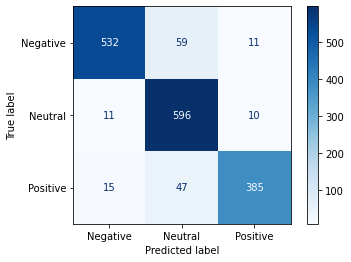

In [107]:
plot_confusion_matrix(text_clf_lsvc, X_test, y_test, cmap='Blues')
plt.show()

In [108]:
model_scores.append(f1_score(y_test,predictions,average='macro'))

## Decision tree

In [109]:
from sklearn.tree import DecisionTreeClassifier

text_clf_tree = Pipeline([('tfidf', TfidfVectorizer()), ('clf', DecisionTreeClassifier())])

In [110]:
text_clf_tree.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', DecisionTreeClassifier())])

In [111]:
predictions = text_clf_tree.predict(X_test)

In [112]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.93      0.89      0.91       602
     Neutral       0.85      0.93      0.89       617
    Positive       0.90      0.84      0.87       447

    accuracy                           0.89      1666
   macro avg       0.89      0.89      0.89      1666
weighted avg       0.89      0.89      0.89      1666



In [113]:
print(f1_score(y_test,predictions,average='macro'))

0.889340514334974


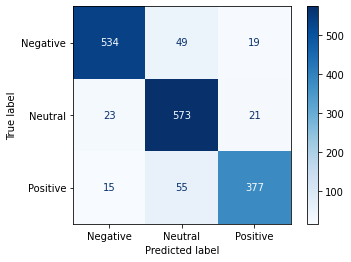

In [114]:
plot_confusion_matrix(text_clf_tree, X_test, y_test, cmap='Blues')
plt.show()

In [115]:
model_scores.append(f1_score(y_test,predictions,average='macro'))

## K Nearest Neighors

In [116]:
from sklearn.neighbors import KNeighborsClassifier

text_clf_knn = Pipeline([('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])

In [117]:
text_clf_knn.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])

In [118]:
predictions = text_clf_knn.predict(X_test)

In [119]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.95      0.80      0.87       602
     Neutral       0.73      0.97      0.83       617
    Positive       0.96      0.72      0.82       447

    accuracy                           0.84      1666
   macro avg       0.88      0.83      0.84      1666
weighted avg       0.87      0.84      0.84      1666



In [120]:
print(f1_score(y_test,predictions,average='macro'))

0.8423574357548302


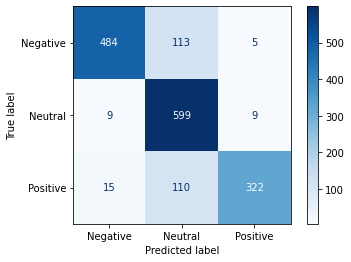

In [121]:
plot_confusion_matrix(text_clf_knn, X_test, y_test, cmap='Blues')
plt.show()

In [122]:
model_scores.append(f1_score(y_test,predictions,average='macro'))

# Ensemble models

### Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier

text_clf_randfo = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier())])

In [124]:
text_clf_randfo.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [125]:
predictions = text_clf_randfo.predict(X_test)

In [126]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.98      0.86      0.91       602
     Neutral       0.82      0.98      0.89       617
    Positive       0.95      0.84      0.89       447

    accuracy                           0.90      1666
   macro avg       0.91      0.89      0.90      1666
weighted avg       0.91      0.90      0.90      1666



In [127]:
print(f1_score(y_test,predictions,average='macro'))

0.8990660887178693


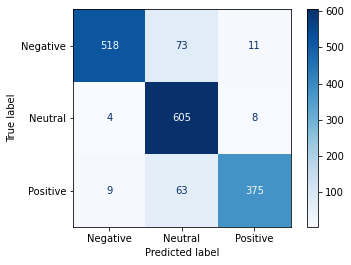

In [128]:
plot_confusion_matrix(text_clf_randfo, X_test, y_test, cmap='Blues')
plt.show()

In [129]:
model_scores.append(f1_score(y_test,predictions,average='macro'))

### Adaboost

In [130]:
from sklearn.ensemble import AdaBoostClassifier

text_clf_ada = Pipeline([('tfidf', TfidfVectorizer()), ('clf', AdaBoostClassifier())])

In [131]:
text_clf_ada.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', AdaBoostClassifier())])

In [132]:
predictions = text_clf_ada.predict(X_test)

In [133]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.96      0.67      0.79       602
     Neutral       0.67      0.97      0.79       617
    Positive       0.92      0.74      0.82       447

    accuracy                           0.80      1666
   macro avg       0.85      0.79      0.80      1666
weighted avg       0.85      0.80      0.80      1666



In [134]:
print(f1_score(y_test,predictions,average='macro'))

0.8026326513250256


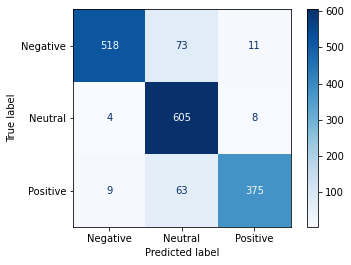

In [135]:
plot_confusion_matrix(text_clf_randfo, X_test, y_test, cmap='Blues')
plt.show()

In [136]:
model_scores.append(f1_score(y_test,predictions,average='macro'))

# Models F1 Score

In [139]:
names = ['Multinomial Naive Bayes', 'SVM', 'Decision Tree', 'KNN', 'Random Forest', 'Adaboost']
models_scores = pd.DataFrame(zip(names,model_scores), columns=['Model Name', 'F1 Score (macro)'])

In [140]:
models_scores

,Model Name,F1 Score (macro)
0,Multinomial Naive Bayes,0.884117
1,SVM,0.907884
2,Decision Tree,0.889341
3,KNN,0.842357
4,Random Forest,0.899066
5,Adaboost,0.802633


# Hypertune parameters with Cross Validation (CV)

### SVM

In [141]:
from sklearn.model_selection import GridSearchCV

In [173]:
param_grid = {'clf__kernel':['linear', 'rbf'],
             'clf__C':[0.01,0.1,1,10]}

text_clf_svc = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(random_state=42))])
grid_search = GridSearchCV(text_clf_svc, param_grid, cv=5, scoring='f1_macro')

grid_search.fit(X_train,y_train)

print("Best estimator is: "+str(grid_search.best_params_))
print("F1-Score (macro avg) on train: "+"{0:.2%}".format(grid_search.best_score_))

Best estimator is: {'clf__C': 10, 'clf__kernel': 'linear'}
F1-Score (macro avg) on train: 91.38%


In [174]:
predictions = grid_search.best_estimator_.predict(X_test)

In [175]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.94      0.93      0.93       602
     Neutral       0.91      0.95      0.93       617
    Positive       0.94      0.90      0.92       447

    accuracy                           0.93      1666
   macro avg       0.93      0.93      0.93      1666
weighted avg       0.93      0.93      0.93      1666



In [176]:
print(f1_score(y_test,predictions,average='macro'))

0.9272656745089368


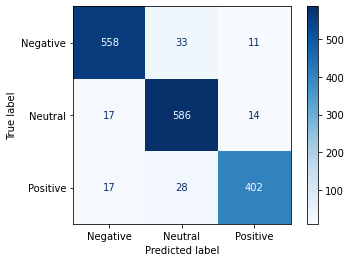

In [177]:
plot_confusion_matrix(grid_search.best_estimator_, X_test, y_test, cmap='Blues')
plt.show()

### Random Forest

In [183]:
param_grid = {'clf__n_estimators':[50,100,150,200],
             'clf__max_features':[2,5,10,15],
             'clf__bootstrap':[True,False],
             'clf__oob_score':[True,False]}

text_clf_randfo = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(random_state=42))])
grid_search = GridSearchCV(text_clf_randfo,param_grid,cv=5,scoring='f1_macro')

grid_search.fit(X_train,y_train)

print("Best estimator is: "+str(grid_search.best_params_))
print("F1-Score (macro avg) on train: "+"{0:.2%}".format(grid_search.best_score_))

c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\user\docume

c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\user\docume

c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\user\docume

c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\user\docume

c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\user\docume

c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\user\docume

c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\user\docume

c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\user\docume

c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\user\docume

Best estimator is: {'clf__bootstrap': False, 'clf__max_features': 15, 'clf__n_estimators': 200, 'clf__oob_score': False}
F1-Score (macro avg) on train: 90.09%


In [184]:
predictions = grid_search.best_estimator_.predict(X_test)

In [185]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.97      0.88      0.92       602
     Neutral       0.85      0.98      0.91       617
    Positive       0.96      0.87      0.91       447

    accuracy                           0.91      1666
   macro avg       0.92      0.91      0.91      1666
weighted avg       0.92      0.91      0.91      1666



In [186]:
print(f1_score(y_test,predictions,average='macro'))

0.9144077743768757


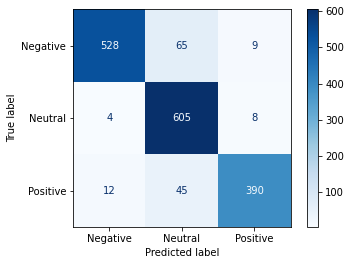

In [187]:
plot_confusion_matrix(grid_search.best_estimator_, X_test, y_test, cmap='Blues')
plt.show()